In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

36.93798692944284 96.88914082335026
52.097769033605516 169.8144939915543
8.62532851399736 -101.99584604872341
-70.0660289591668 26.73239735926535
15.828508908034934 160.1134229420557
-49.857354931710404 17.430465727923576
61.16884648133458 21.703326512525507
47.0137246546505 141.35929825676993
48.63640168650639 -89.10047230986727
79.68383195179044 106.75619023989339
-38.22234905620192 45.38224226396238
40.189055455972465 -74.72197160742797
72.94443008867586 83.16123428643203
-58.59371757877354 149.88138714280848
-5.506351651285328 -83.80408490412839
-22.844674327549697 57.45426600783014
51.520742582746294 -4.92866344299901
30.671725497275304 171.57812509196003
0.6465589112125656 -98.27294887682119
-61.81079588460783 -3.2299182632444854
0.9793756273023178 -165.62924210507308
44.845132768541475 -80.94427936818337
22.109074624329878 31.460614238019474
-77.88893739803504 -51.23489636935864
35.24145453694 158.86502233927087
64.44114109947537 145.43613801458037
-63.327628737574905 -172.57757

In [5]:
# Import citipy module
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

# If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

621

In [33]:
# Impor the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval")
print("------------------------")

#Create counters.
record_count = 1 
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | yumen
Processing Record 2 of Set 1 | nikolskoye
Processing Record 3 of Set 1 | acapulco
Processing Record 4 of Set 1 | kruisfontein
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | eurajoki
Processing Record 8 of Set 1 | nevelsk
Processing Record 9 of Set 1 | thunder bay
Processing Record 10 of Set 1 | khatanga
Processing Record 11 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 12 of Set 1 | trenton
Processing Record 13 of Set 1 | dikson
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | talara
Processing Record 16 of Set 1 | saint-philippe
Processing Record 17 of Set 1 | haverfordwest
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | saleaula
City not found. Skipping...
Processing Record 21 of Set 1 | wiarton
Processing Record 22 of Set

Processing Record 38 of Set 4 | la ronge
Processing Record 39 of Set 4 | zhuanghe
Processing Record 40 of Set 4 | narsaq
Processing Record 41 of Set 4 | kuchinarai
Processing Record 42 of Set 4 | manicore
Processing Record 43 of Set 4 | phalodi
Processing Record 44 of Set 4 | sanchi
Processing Record 45 of Set 4 | sao joao da barra
Processing Record 46 of Set 4 | ambon
Processing Record 47 of Set 4 | ahipara
Processing Record 48 of Set 4 | ixtapa
Processing Record 49 of Set 4 | mahon
Processing Record 50 of Set 4 | arraial do cabo
Processing Record 1 of Set 5 | nanortalik
Processing Record 2 of Set 5 | perpignan
Processing Record 3 of Set 5 | olinda
Processing Record 4 of Set 5 | vanderhoof
Processing Record 5 of Set 5 | bilibino
Processing Record 6 of Set 5 | paita
Processing Record 7 of Set 5 | coquimbo
Processing Record 8 of Set 5 | flin flon
Processing Record 9 of Set 5 | carnarvon
Processing Record 10 of Set 5 | nadym
Processing Record 11 of Set 5 | sorvag
City not found. Skipping

Processing Record 21 of Set 8 | mount isa
Processing Record 22 of Set 8 | wanning
Processing Record 23 of Set 8 | hopatcong
Processing Record 24 of Set 8 | robe
Processing Record 25 of Set 8 | saint-pierre
Processing Record 26 of Set 8 | santa vitoria do palmar
Processing Record 27 of Set 8 | shar
Processing Record 28 of Set 8 | amazar
Processing Record 29 of Set 8 | pangody
Processing Record 30 of Set 8 | meyungs
City not found. Skipping...
Processing Record 31 of Set 8 | la asuncion
Processing Record 32 of Set 8 | saldanha
Processing Record 33 of Set 8 | sri aman
Processing Record 34 of Set 8 | warqla
City not found. Skipping...
Processing Record 35 of Set 8 | dwarka
Processing Record 36 of Set 8 | verkhniye kigi
Processing Record 37 of Set 8 | clarksburg
Processing Record 38 of Set 8 | casas grandes
Processing Record 39 of Set 8 | dukat
Processing Record 40 of Set 8 | baniachang
Processing Record 41 of Set 8 | ilulissat
Processing Record 42 of Set 8 | shakawe
Processing Record 43 of

Processing Record 10 of Set 12 | mount gambier
Processing Record 11 of Set 12 | mahanoro
Processing Record 12 of Set 12 | harnosand
Processing Record 13 of Set 12 | alenquer
Processing Record 14 of Set 12 | bambamarca
Processing Record 15 of Set 12 | auki
Processing Record 16 of Set 12 | burnie
Processing Record 17 of Set 12 | grande-riviere
City not found. Skipping...
Processing Record 18 of Set 12 | botlikh
Processing Record 19 of Set 12 | conil
Processing Record 20 of Set 12 | siguiri
Processing Record 21 of Set 12 | borgarnes
Processing Record 22 of Set 12 | sabang
Processing Record 23 of Set 12 | mweka
Processing Record 24 of Set 12 | shu
Processing Record 25 of Set 12 | meulaboh
Processing Record 26 of Set 12 | wajir
Processing Record 27 of Set 12 | malanje
Processing Record 28 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 29 of Set 12 | srednekolymsk
Processing Record 30 of Set 12 | araguaina
Processing Record 31 of Set 12 | maceio
Processing Record 32 of Se

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yumen,40.2833,97.2000,12.70,64,1,27.38,CN,2023-01-18 02:31:38
1,Nikolskoye,59.7035,30.7861,33.80,97,100,10.69,RU,2023-01-18 02:31:38
2,Acapulco,16.8634,-99.8901,80.42,69,40,5.75,MX,2023-01-18 02:30:05
3,Kruisfontein,-34.0033,24.7314,71.89,81,100,8.14,ZA,2023-01-18 02:28:08
4,Butaritari,3.0707,172.7902,81.37,79,50,17.98,KI,2023-01-18 02:31:39
5,Hermanus,-34.4187,19.2345,72.81,89,98,8.72,ZA,2023-01-18 02:30:20
6,Eurajoki,61.2000,21.7333,32.02,97,100,10.38,FI,2023-01-18 02:31:39
7,Nevelsk,46.6733,141.8633,18.37,72,100,18.90,RU,2023-01-18 02:31:40
8,Thunder Bay,48.4001,-89.3168,24.78,80,100,9.22,CA,2023-01-18 02:27:56
9,Khatanga,71.9667,102.5000,-36.54,100,42,5.44,RU,2023-01-18 02:31:40


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
df = city_data_df[new_column_order]
df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yumen,CN,2023-01-18 02:31:38,40.2833,97.2000,12.70,64,1,27.38
1,Nikolskoye,RU,2023-01-18 02:31:38,59.7035,30.7861,33.80,97,100,10.69
2,Acapulco,MX,2023-01-18 02:30:05,16.8634,-99.8901,80.42,69,40,5.75
3,Kruisfontein,ZA,2023-01-18 02:28:08,-34.0033,24.7314,71.89,81,100,8.14
4,Butaritari,KI,2023-01-18 02:31:39,3.0707,172.7902,81.37,79,50,17.98
5,Hermanus,ZA,2023-01-18 02:30:20,-34.4187,19.2345,72.81,89,98,8.72
6,Eurajoki,FI,2023-01-18 02:31:39,61.2000,21.7333,32.02,97,100,10.38
7,Nevelsk,RU,2023-01-18 02:31:40,46.6733,141.8633,18.37,72,100,18.90
8,Thunder Bay,CA,2023-01-18 02:27:56,48.4001,-89.3168,24.78,80,100,9.22
9,Khatanga,RU,2023-01-18 02:31:40,71.9667,102.5000,-36.54,100,42,5.44


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

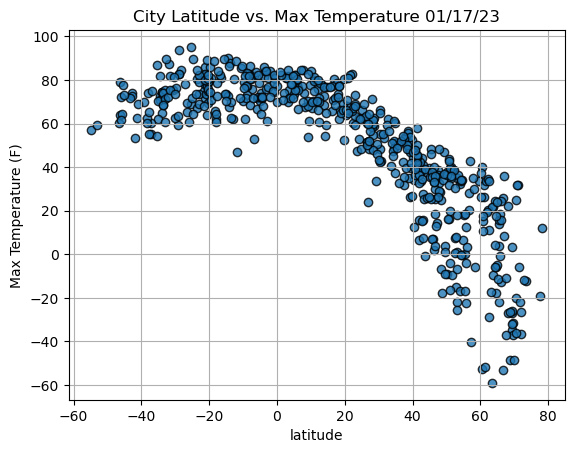

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

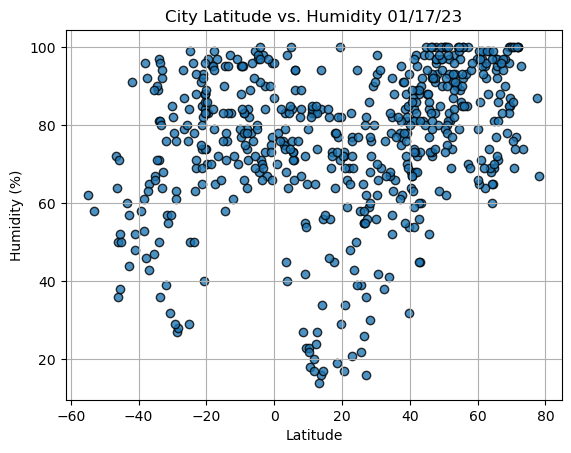

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

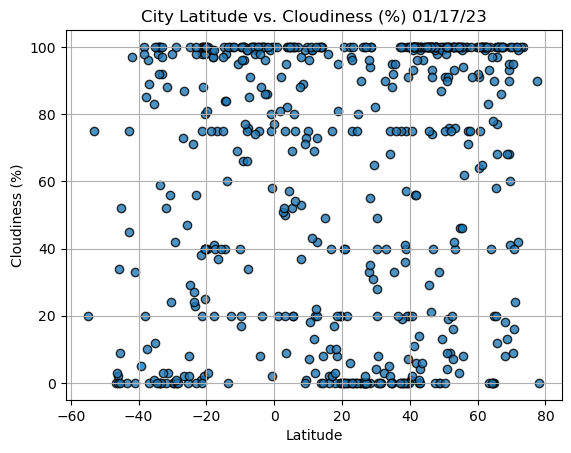

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

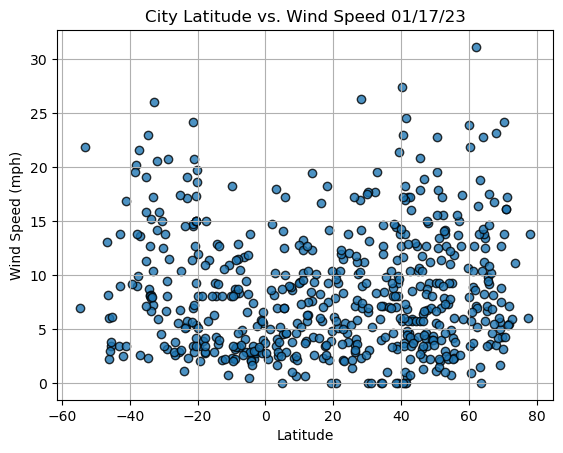

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                       Talara
Lat                       -4.5772
Lng                      -81.2719
Max Temp                    74.16
Humidity                       68
Cloudiness                     75
Wind Speed                   13.8
Country                        PE
Date          2023-01-18 02:31:42
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4       True
       ...  
563     True
564     True
565     True
566     True
567     True
Name: Lat, Length: 568, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yumen,40.2833,97.2000,12.70,64,1,27.38,CN,2023-01-18 02:31:38
1,Nikolskoye,59.7035,30.7861,33.80,97,100,10.69,RU,2023-01-18 02:31:38
2,Acapulco,16.8634,-99.8901,80.42,69,40,5.75,MX,2023-01-18 02:30:05
4,Butaritari,3.0707,172.7902,81.37,79,50,17.98,KI,2023-01-18 02:31:39
6,Eurajoki,61.2000,21.7333,32.02,97,100,10.38,FI,2023-01-18 02:31:39
...,...,...,...,...,...,...,...,...,...
563,Safaga,26.7292,33.9365,59.74,55,2,11.77,EG,2023-01-18 02:46:46
564,Tagusao,9.1924,117.8141,82.94,72,71,2.48,PH,2023-01-18 02:46:46
565,Olafsvik,64.8945,-23.7142,23.86,70,90,12.46,IS,2023-01-18 02:46:46
566,Baruun-Urt,46.6806,113.2792,3.58,81,91,4.45,MN,2023-01-18 02:46:47


In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yumen,40.2833,97.2000,12.70,64,1,27.38,CN,2023-01-18 02:31:38
1,Nikolskoye,59.7035,30.7861,33.80,97,100,10.69,RU,2023-01-18 02:31:38
2,Acapulco,16.8634,-99.8901,80.42,69,40,5.75,MX,2023-01-18 02:30:05
4,Butaritari,3.0707,172.7902,81.37,79,50,17.98,KI,2023-01-18 02:31:39
6,Eurajoki,61.2000,21.7333,32.02,97,100,10.38,FI,2023-01-18 02:31:39


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

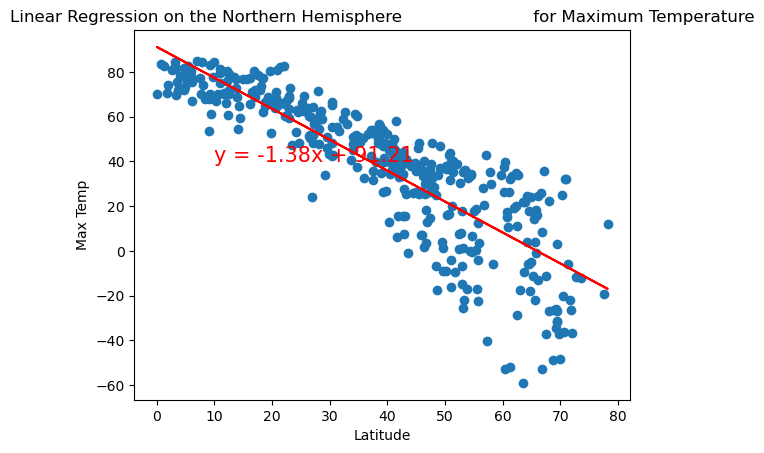

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature','Max Temp',(10,40))


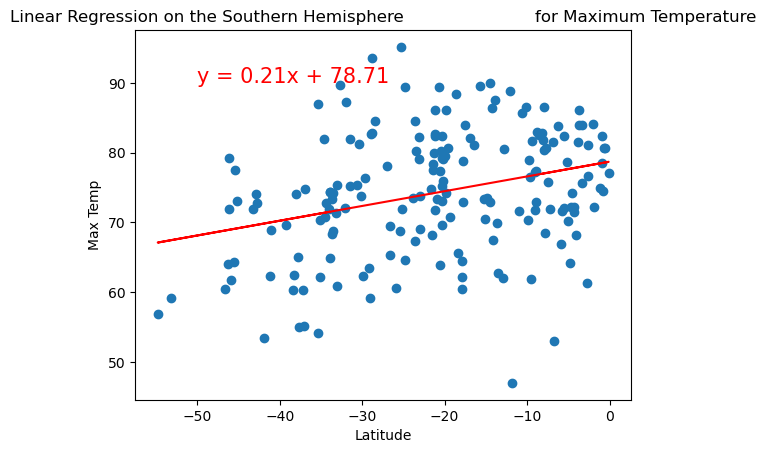

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

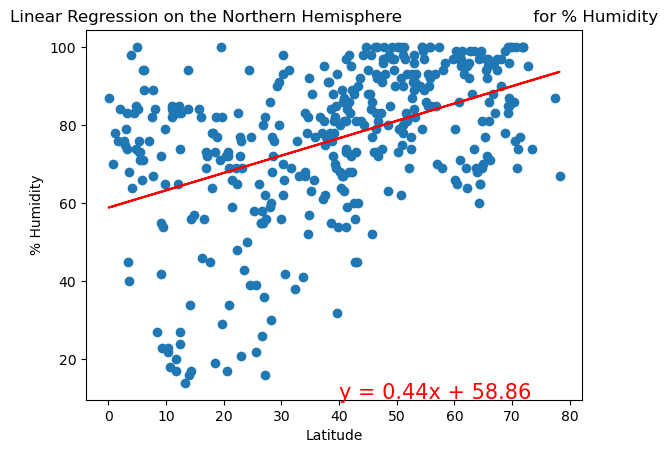

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

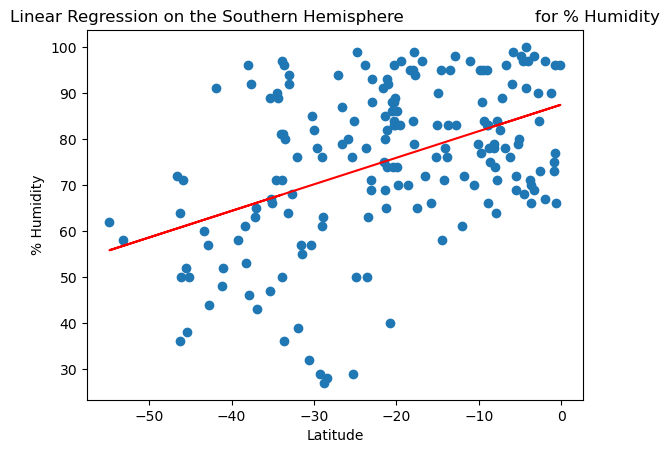

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

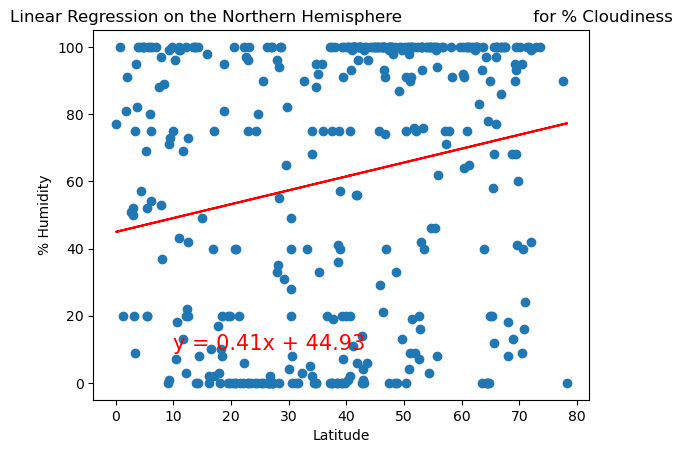

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Humidity',(10, 10))

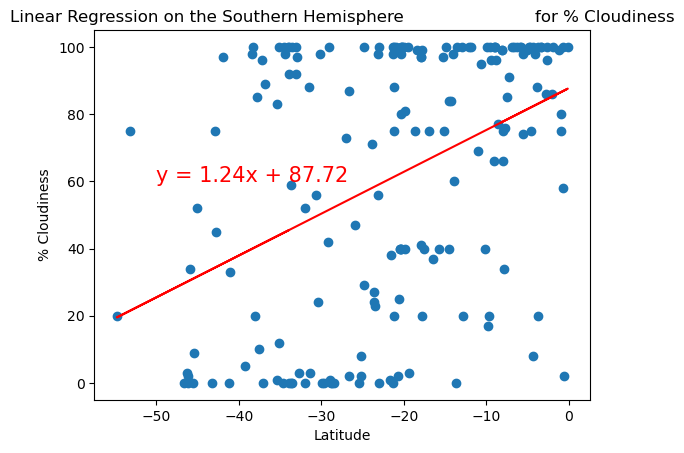

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

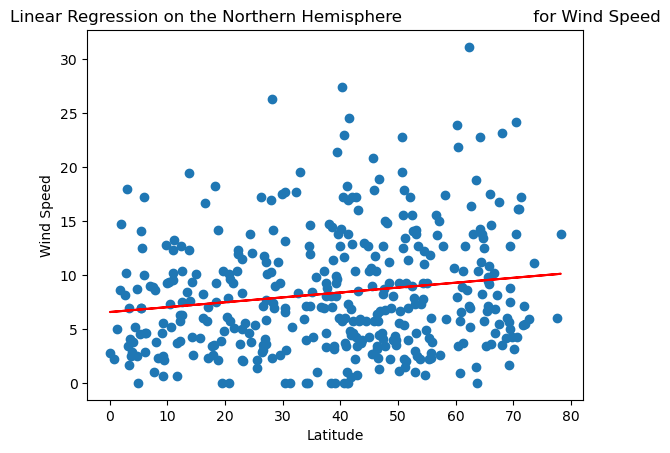

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

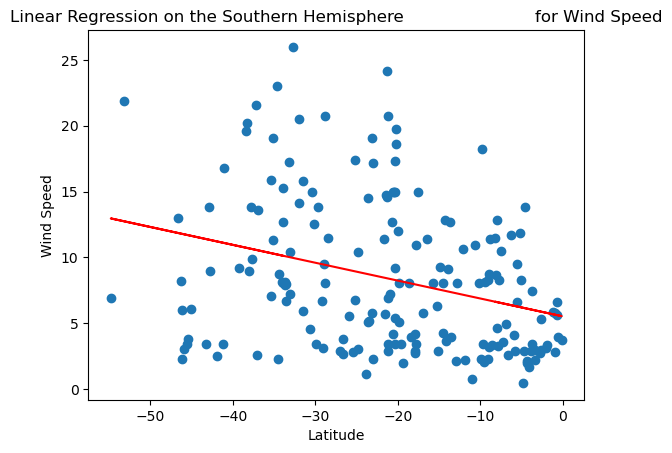

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))